### Ejercicio de Boston House Price

El grupo:
Elena, Mikel, Daniel, Rodrigo y Américo

### Step 1 importamos los paquetes

In [1]:
# pip install ipywidgets
# pip install geocoder
# pip install geopy
#!pip install vega_datasets 
#!pip install plotly
#!pip install wordcloud
#!pip install nbformat>5 
#!pip install folium

In [2]:
# Importamos todos los paquetes que vayamos a necesitar

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import folium 
import geocoder # pip install geocoder




### Step 2 tomaremos el fichero en (ruta)

In [3]:
data = pd.read_csv('./data/boston_house_prices.csv')

data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Step 3. Veamos los tipos de datos.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Step 4. Cread un dataframe con la información de abajo

In [5]:
df_boston = pd.DataFrame(data)

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Step 5. Buscad valores faltantes

In [10]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

No se observan valores faltantes por lo tanto no es necesario , a priori, hacer ningun tipo de modificación.

### Rodrigo

### Daniel

##### Correlación entre la columna NOX y las columnas DIS, RAD e INDUS. 
Si miramos las actividades que crean óxido de nitrógeno:

-Combustión de los motores de vehículos que relaciona NOX con DIS y RAD.

-La superficie dedicada a negocios no minoristas, por ejemplo la Industria, el Transporte o la Ganaderia relaciona NOX con INDUS.

La correlación que existe entre NOX y TAX o LSTAT se explica al tener en cuenta que estos son parametros que informan indirectamente de la riqueza de la zona, la cual viene determinada por parametros que informan sobre los tipos de negocios de la zona (INDUS), el acceso a infraestructuras y transporte (RAD), y el valor de las propiedades (PRICE).

Correlación NOX-DIS:  -0.7692301132258278
Correlación NOX-RAD:  0.6114405634855773
Correlación NOX-RAD:  0.7636514469209147


<Axes: >

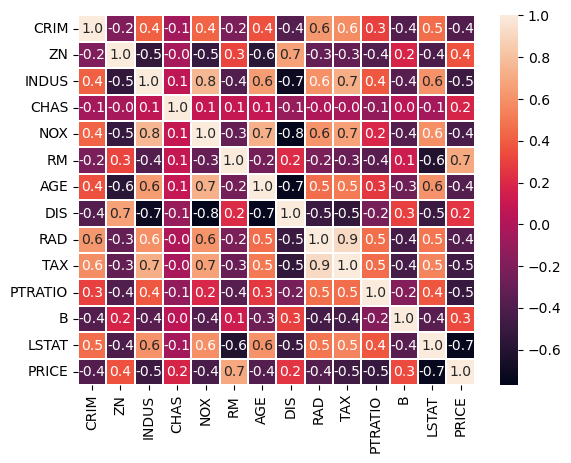

In [ ]:
df_boston = pd.DataFrame(data)
print(f"Correlación NOX-DIS: ",df_boston["NOX"].corr(df_boston["DIS"]))
print(f"Correlación NOX-RAD: ",df_boston["NOX"].corr(df_boston["RAD"]))
print(f"Correlación NOX-RAD: ",df_boston["NOX"].corr(df_boston["INDUS"]))
sns.heatmap(df_boston.corr(),annot=True, fmt=".1f", linewidths="0.2")

#### Correlacion entre RAD y NOX:

Hay una agrupación a la izquierda de zonas más alejadas de la autopista radial y, por lo tanto, suponemos con una menor cantidad de vehiculos circulando. Por otro lado, a la derecha vemos varias zonas con mayor accesibilidad a la autopista radial y mayor óxido de nitrogeno. El lugar donde suelen encontrarse las zonas industriales, en el extrarradio de las ciudades, donde debería haber mayores cantidades de NOX.

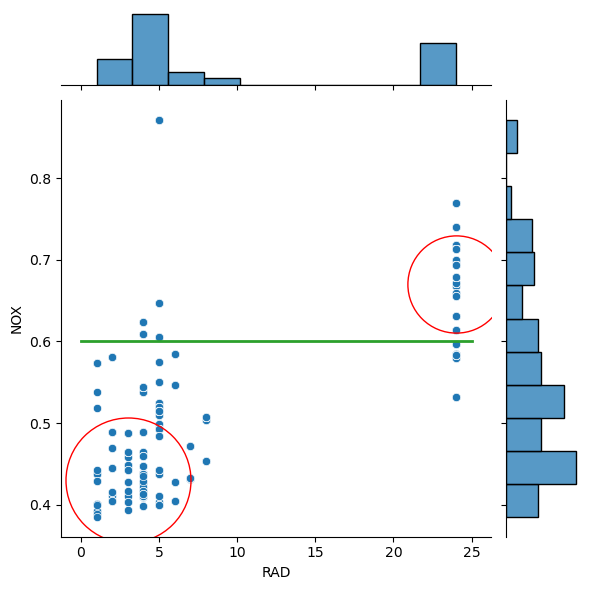

In [ ]:
a = sns.jointplot(x=df_boston["RAD"], y=df_boston["NOX"], data=df_boston)
a.ax_joint.plot([3],[0.43],'o',ms=90 , mec='r', mfc='none')
a.ax_joint.plot([24],[0.67],'o',ms=70 , mec='r', mfc='none')
plt.plot([0, 25], [0.6, 0.6], linewidth=2)

#### Correlación entre NOX e INDUS: 
Cuanto mayor uso de la superficie para negocios "no minoristas", una mayor cantidad de óxido de nitrogeno.

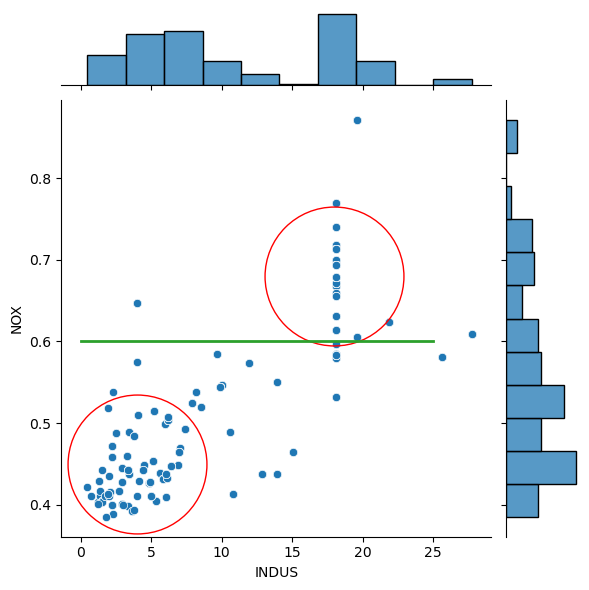

In [ ]:
a = sns.jointplot(x=df_boston["INDUS"], y=df_boston["NOX"], data=df_boston)
a.ax_joint.plot([4],[0.45],'o',ms=100 , mec='r', mfc='none')
a.ax_joint.plot([18],[0.68],'o',ms=100 , mec='r', mfc='none')
plt.plot([0, 25], [0.6, 0.6], linewidth=2)

#### Correlación entre NOX y DIS: 
Asumiendo que los centros de empleo se suelen encontrar en los centros atestados de las ciudades o en hubs específicos parece sensato concluir que cuanto más cerca de un centro de empleo habra más vehiculos en circulación. Así aumentando el NOX, pero al no encontarse estas zonas cerca de actividades industriales podria darse un efecto de disminución simultaneo.

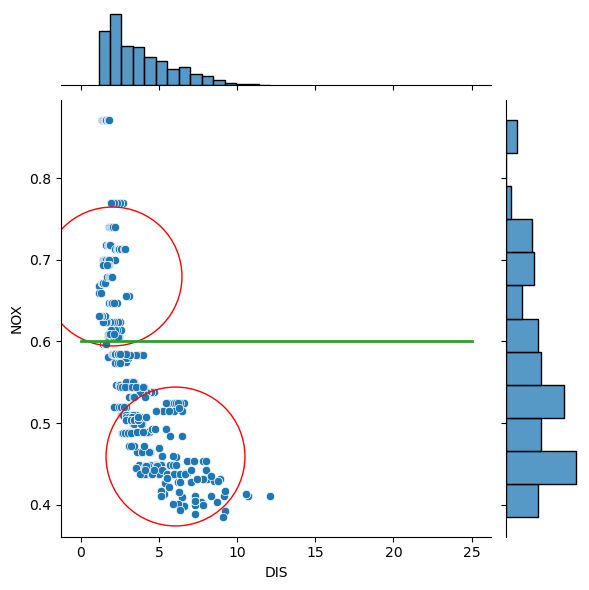

In [ ]:
a = sns.jointplot(x=df_boston["DIS"], y=df_boston["NOX"], data=df_boston)
a.ax_joint.plot([6],[0.46],'o',ms=100 , mec='r', mfc='none')
a.ax_joint.plot([2],[0.68],'o',ms=100 , mec='r', mfc='none')
plt.plot([0, 25], [0.6, 0.6], linewidth=2)

<Axes: xlabel='DIS', ylabel='NOX'>

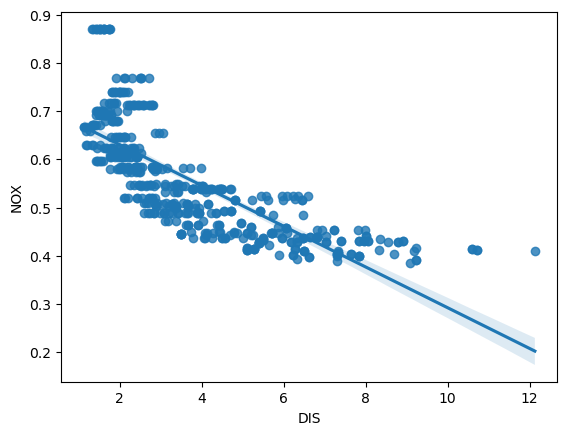

In [ ]:
sns.regplot(x=df_boston["DIS"], y=df_boston["NOX"])

Sin embargo, ha de relacionarse todo lo anterior con datos geográficos adicionales de la ciudad para confirmar esta hipótesis.

### Mikel

# **Distribucion de las casas por precio**:
Vamos a realizar una observacion de como se distribuyen los precios de las casas y si podemos sacar alguna agrupación de los precios de las casas y que caracteristicas comparten.

C:\Users\esetx\AppData\Local\Temp\ipykernel_4788\1121776955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_boston["PRICE"],


<Axes: xlabel='PRICE'>

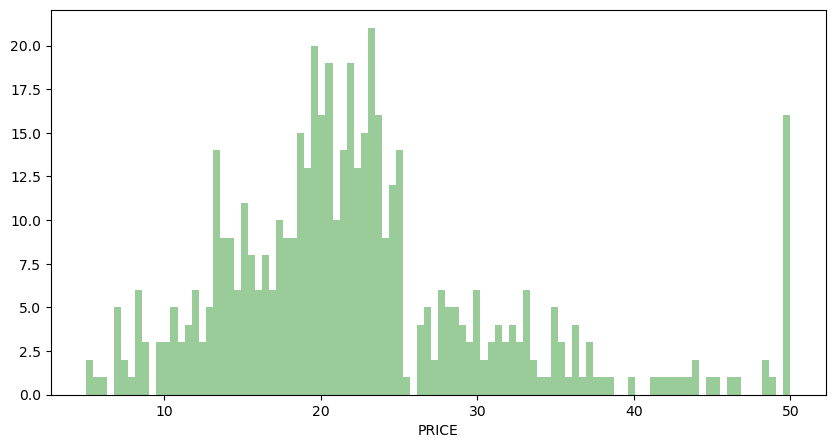

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(df_boston["PRICE"],
             kde=False,
             color='g',
             bins=100)

In [7]:
p_0 = np.percentile(df_boston['PRICE'], 0) #Q0 #Min
p_25 = np.percentile(df_boston['PRICE'], 25) #Q1
p_50 = np.percentile(df_boston['PRICE'], 50) #Q2 #Mediana
p_75 = np.percentile(df_boston['PRICE'], 75) #Q3
p_100 = np.percentile(df_boston['PRICE'], 100) #Q4 #Max

print("Valor del percentil 0:", p_0)
print("Valor del percentil 25:", p_25)
print("Valor del percentil 50:", p_50)
print("Valor del percentil 75:", p_75)
print("Valor del percentil 100:", p_100)
print("Valor media:", round(df_boston['PRICE'].mean(),2) )

Valor del percentil 0: 5.0
Valor del percentil 25: 17.025
Valor del percentil 50: 21.2
Valor del percentil 75: 25.0
Valor del percentil 100: 50.0
Valor media: 22.53


# Observaciones
Podemos observar que los precios de las casas se distribuyen de la siguiente manera.

Se observa que hay una distribucion **sesgada a la derecha**, lo que indica que tiene un sesgo positivo considerable , la mayoria de las casas tienen precios mas bajo.

Por otro lado hay una pequeña cantidad de casas de hasta 50k dolares, en concreto, 16 casas. Me gustaría estudiar que tienen de especial esas casas más adelante. Me imagino que son casas de lujo pero indagaremos más.






# Observaciones Importantes

He querido crear un subgrupo de los precios de acuerdo a lo que marcaban los percentiles mas importantes pero no reflejan los detalles de como se distribuyen ,por lo tanto, en su lugar, una alternativa **podría ser utilizar percentiles más extremos, como el 10, 25, 75 y 90**, para definir las categorías de precios. Esto permitiría identificar de manera más precisa los valores atípicos y las diferentes modas en la distribución.

Por ejemplo, podrías definir las categorías de la siguiente manera:

Bajo: menor que el percentil 25
Medio: entre el percentil 25 y el 75
Alto: entre el percentil 75 y el 90
Muy alto: mayor que el percentil 90

In [8]:
percentil_10 = df_boston['PRICE'].quantile(0.1)
percentil_25 = df_boston['PRICE'].quantile(0.25)
percentil_75 = df_boston['PRICE'].quantile(0.75)
percentil_90 = df_boston['PRICE'].quantile(0.9)

# Definir los rangos y etiquetas
bins = [-float('inf'), percentil_25, percentil_75, percentil_90, float('inf')]
etiquetas = ['Bajo', 'Medio', 'Alto', 'Muy Alto']

# Crear la nueva columna categórica
df_boston['Categoria_Precio'] = pd.cut(df_boston['PRICE'], bins=bins, labels=etiquetas)

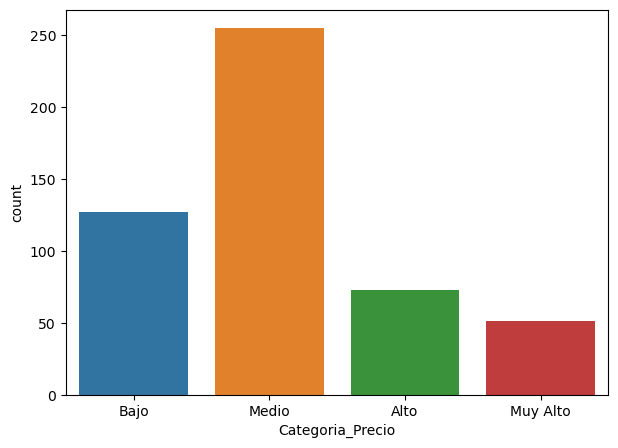

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_boston['Categoria_Precio'], hue=df_boston['Categoria_Precio']);

In [10]:
#Cuantas casas hay para Categoria-Precio
df_boston['Categoria_Precio'].value_counts()

Categoria_Precio
Medio       255
Bajo        127
Alto         73
Muy Alto     51
Name: count, dtype: int64

# Análisis del resto de casas por su valor
Vamos a analizar el restos de casas y ver cuales son sus caracteristicas mas destacables.

1. Análisis de las casas con valor Bajo.

In [11]:
#Analisis estadistico de las casas con valor Bajo
df_boston[df_boston['Categoria_Precio'] == 'Bajo'].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,10.986203,0.393701,17.018189,0.039370,0.668157,5.886496,92.868504,2.277718,17.141732,567.834646,19.651969,285.830315,21.067795,12.726772
std,14.208815,2.698934,4.641761,0.195244,0.094925,0.592155,9.240411,1.173490,9.479907,153.257837,1.774996,143.964769,5.972431,2.974533
min,0.024980,0.000000,1.890000,0.000000,0.448000,4.138000,37.800000,1.137000,1.000000,188.000000,14.700000,0.320000,7.880000,5.000000
25%,1.513335,0.000000,18.100000,0.000000,0.603000,5.550500,90.550000,1.598450,5.000000,403.000000,20.200000,171.090000,17.115000,10.850000
50%,7.752230,0.000000,18.100000,0.000000,0.679000,5.950000,95.400000,1.866200,24.000000,666.000000,20.200000,363.020000,19.920000,13.400000
75%,13.795750,0.000000,18.100000,0.000000,0.713000,6.342000,98.850000,2.334800,24.000000,666.000000,20.200000,396.660000,24.275000,15.000000
max,88.976200,25.000000,27.740000,1.000000,0.871000,7.313000,100.000000,6.818500,24.000000,711.000000,21.200000,396.900000,37.970000,17.000000


En general, las viviendas de precios bajos tienden a estar ubicadas en áreas con **mayores tasas de criminalidad** con 10.98 puntos, lo cual es consistente con las expectativas del mercado inmobiliario. 

Tambien **tienen una media de DIS inferior a la media total** lo cual indica que pueden estar mas alejadas de los centros de empleo.

La **variable Age** indica una **media de 92 años**, son las casas **mas antiguas** con diferencia.

Tienen una media de **5.8** habitaciones, menos que el resto de viviendas y el **precio medio es de 12k $**

Tiene un indice medio **LSTAT de 21** lo que concuerda con un status socieeconomico bajo.

Un **indice medio NOX  más alto que las otras casas** por estar más cerca de zona industrial con un indice **INDUS** de media de 17 puntos.

La **ZN (Proporción de zona residencial)**:es de las **mas bajas con una media de 0.39**

Acceso a las autopistas de (**RAD**) DE 17 puntos.

# Análisis de casas con precio medio

In [12]:
#Analisis estadistico de las casas con valor Medio
df_boston[df_boston['Categoria_Precio'] == 'Medio'].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,1.310119,9.907843,10.654824,0.054902,0.528615,6.113102,62.919608,4.274889,7.505882,375.827451,18.652157,377.871412,11.673529,21.227843
std,2.873049,20.857181,6.287742,0.228237,0.100393,0.414580,26.687832,2.102887,7.264340,141.208792,1.859193,51.771910,4.631557,2.210544
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.863000,6.000000,1.454700,1.000000,188.000000,13.000000,22.010000,3.590000,17.100000
25%,0.075700,0.000000,5.640000,0.000000,0.448000,5.886500,42.000000,2.513650,4.000000,282.500000,17.800000,381.055000,8.245000,19.400000
50%,0.167600,0.000000,9.690000,0.000000,0.515000,6.108000,66.100000,3.747600,5.000000,311.000000,19.000000,393.290000,11.100000,21.200000
75%,0.633860,12.500000,18.100000,0.000000,0.581000,6.365000,87.500000,5.502700,6.000000,411.000000,20.200000,396.900000,14.115000,23.100000
max,18.811000,85.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,34.370000,25.000000


El **indice CRIM** tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La **tasa ZN** indica una proporcion de zona residencial cercana a la media total.

La **media de AGE es de 62 años**  inferior a las casas de valor bajo.

Tiene un **indice medio LSTAT** de 11 lo que concuerda con un status socieeconomico bajo.

Las casas tienen un **precio medio de 21k $**

Los indices **NOX** son más bajos que las casas de valor bajo. 0.52 de media y el indice **INDUS** algo menos con 10.65 puntos.



# Análisis de casas con precio Alto




In [13]:
#Analisis estadistico de las casas con valor Alto
df_boston[df_boston['Categoria_Precio'] == 'Alto'].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.656024,25.630137,5.770274,0.109589,0.480056,6.743438,51.661644,4.753190,5.561644,306.739726,17.138356,384.465479,7.047260,29.760274
std,2.262153,30.403653,4.443401,0.314539,0.072476,0.525740,28.016610,2.143492,4.904608,102.126695,2.026260,27.702868,3.332307,2.502817
min,0.009060,0.000000,1.250000,0.000000,0.400000,3.561000,2.900000,1.285200,1.000000,187.000000,12.600000,179.360000,2.940000,25.100000
25%,0.041130,0.000000,2.890000,0.000000,0.433000,6.604000,29.100000,3.215700,3.000000,254.000000,16.000000,384.460000,4.730000,27.900000
50%,0.079780,20.000000,4.860000,0.000000,0.458000,6.782000,49.300000,4.267300,5.000000,284.000000,17.600000,392.200000,6.360000,29.600000
75%,0.190730,40.000000,6.410000,0.000000,0.507000,7.014000,76.500000,6.062200,7.000000,329.000000,18.400000,394.760000,8.050000,31.700000
max,14.438300,100.000000,19.580000,1.000000,0.718000,7.420000,100.000000,12.126500,24.000000,666.000000,20.900000,396.900000,19.780000,34.700000


El **indice CRIM** tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La **tasa ZN** indica una proporcion de zona residencial **mas alta** que la media total de 25. y la tasa **INDUS** es mas baja que la media total.

La **media de AGE es de 51 años**  inferior a las casas de valor bajo.

Tiene un **indice medio LSTAT** de 7 lo que concuerda con un status socieeconomico medio alto.

Las casas tienen un **precio medio de 29k $**

# Análisis de casas con precio muy alto

In [ ]:
#Analisis estadistico de las casas con valor Alto
df_boston[df_boston['Categoria_Precio'] == 'Muy Alto'].describe()

El **indice CRIM** tiene un valor medio de 1.31 por lo tanto este tipo de casas no se encuentran en lugares de alta criminalidad.

La **tasa ZN** indica una proporcion de zona residencial **más alta** a la media total de 25.

La **media de AGE es de 60 años**  inferior a las casas de valor bajo.

Tiene un **indice medio LSTAT** de 4 lo que concuerda con un status socieeconomico mas alto.

Las casas tienen un **precio medio de 43k $**

### Elena

### Americo